# Iris
##### Iris is one of the simplest and best konwn datasets used in machine learning. 

In [1]:
from core.models import *
from core.regularizers import *
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# we have to get some data for training and testing our model
# iris is basic, well known dataset, we can use it 

iris = load_iris()                      
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series((iris.target != 0) * 1, name='feature')

data = X
data['variety'] = y

# train-test split
X_train, X_test, y_train, y_test = tts(X, y)

## Data presentation

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.666667
std,0.828066,0.435866,1.765298,0.762238,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


In [5]:
y.describe()

count    150.000000
mean       0.666667
std        0.472984
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: feature, dtype: float64

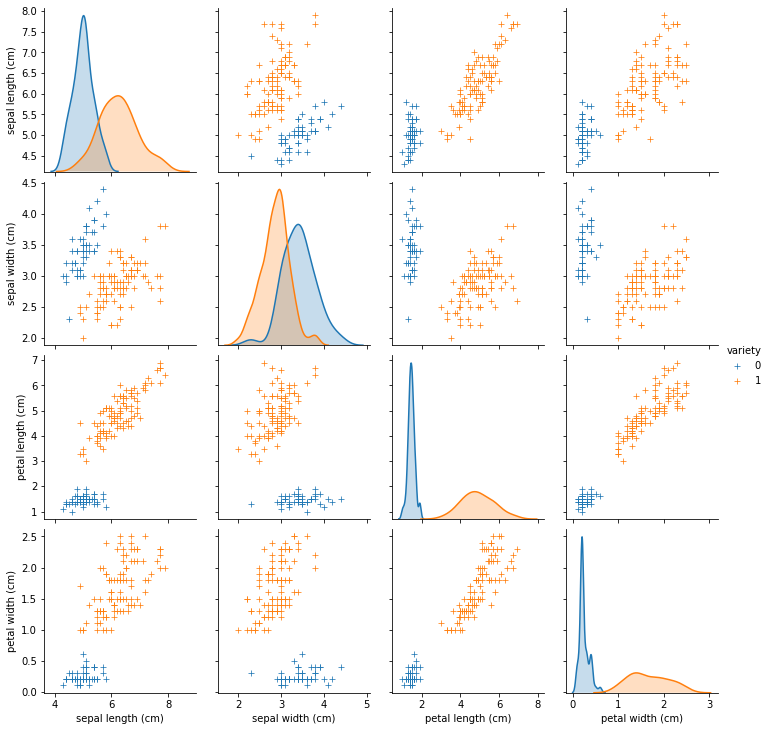

In [6]:
g = sns.pairplot(data, hue='variety', markers='+')
plt.show()

<AxesSubplot:>

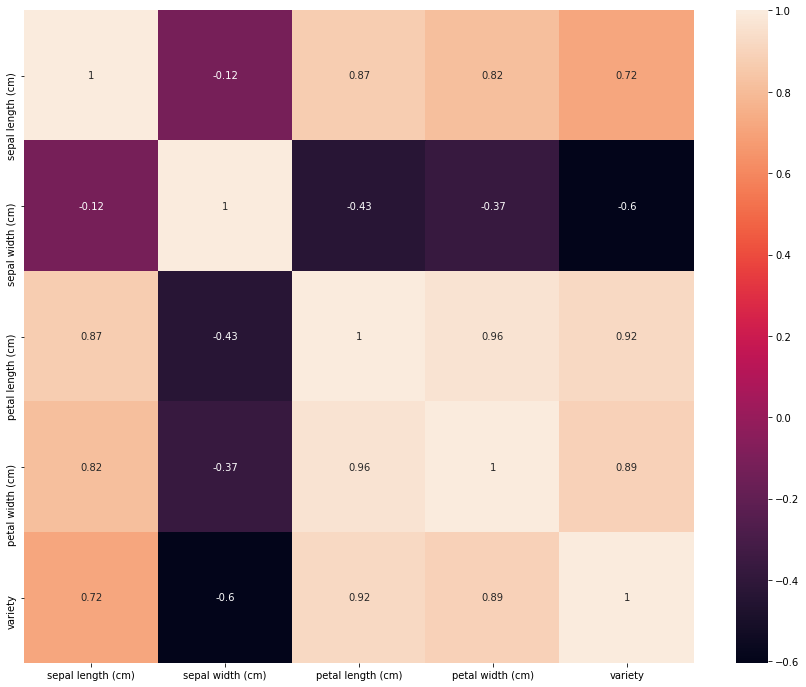

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(X.corr(), annot=True)

## Example of usage with iris dataset

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(optimizer: RMSPropOptimizer(learning_rate: 0.03, beta: 0.9, epsilon: 1e-07), regularizer: RidgeRegularizer(alpha: 0.1), num_iterations: 300, threshold: 0.5, fit_intercept: True)

In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        29

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [10]:
# choosing optimizer
optimizer = RMSPropOptimizer()

# choosing regularizer
regularizer = LassoRegularizer()

# choosing different parameters such as number of iterations and threshold
num = 300
th = 0.6

# building our model with chosen parameters
model = LogisticRegression(optimizer=optimizer, regularizer=regularizer, num_iterations=num, threshold=th, verbose=True)
model.fit(X_train, y_train)

Epoch number 10 of 300: loss:0.4534145148026212
Epoch number 20 of 300: loss:0.4019445250201757
Epoch number 30 of 300: loss:0.3700100197129617
Epoch number 40 of 300: loss:0.34984041701417284
Epoch number 50 of 300: loss:0.3334466229615499
Epoch number 60 of 300: loss:0.3346505883907286
Epoch number 70 of 300: loss:0.3285347771213012
Epoch number 80 of 300: loss:0.3294069544112288
Epoch number 90 of 300: loss:0.33016145118756873
Epoch number 100 of 300: loss:0.33140687562689886
Epoch number 110 of 300: loss:0.3318172512863959
Epoch number 120 of 300: loss:0.3297123607616946
Epoch number 130 of 300: loss:0.33538442149132314
Epoch number 140 of 300: loss:0.33350652409016307
Epoch number 150 of 300: loss:0.33323435634342774
Epoch number 160 of 300: loss:0.3310617461375219
Epoch number 170 of 300: loss:0.3362991772567728
Epoch number 180 of 300: loss:0.32853288718413304
Epoch number 190 of 300: loss:0.32780944560610115
Epoch number 200 of 300: loss:0.33511956807159227
Epoch number 210 of 

LogisticRegression(optimizer: RMSPropOptimizer(learning_rate: 0.03, beta: 0.9, epsilon: 1e-07), regularizer: LassoRegularizer(alpha: 0.1), num_iterations: 300, threshold: 0.6, fit_intercept: True)

In [11]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        29

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

